# Graphing GSEA HALLMARK pathways for CD38+CD39+ and CD38+CD39- populations in Teee RNAseq
### https://www.gsea-msigdb.org/gsea/doc/GSEAUserGuideFrame.html
  ### *GSEA desktop application 
  ### *https://www.pnas.org/doi/abs/10.1073/pnas.0506580102
## data analyzed by GSEA 01Sept2022
### file folder Teee_pp_pn.Gsea.1662073767537

In [1]:
#import libraries
import pandas as pd
import os 
import seaborn as sns
import matplotlib.pyplot as plt

## Graphing the pathways based on NES value
### Normalized Enrichment Score (NES)
#### primary statistic for examining gene set enrichment results
#### accounts for differences in gene set size and in correlations between gene sets and the expression dataset
#### NES can be used to compare analysis results across gene sets

In [2]:
# from the GSEA output folder: 
#read in files for the pos_pos (double positive) and neg_neg (double negative) reports
# gsea_report_for_pp_1662073767537.tsv
# gsea_report_for_pn_1662073767537.tsv
df_pp = pd.read_csv('/Users/carol/gsea_home/output/sep01/Teee_pp_pn.Gsea.1662073767537/gsea_report_for_pp_1662073767537.tsv', delimiter = '\t')
df_pn = pd.read_csv('/Users/carol/gsea_home/output/sep01/Teee_pp_pn.Gsea.1662073767537/gsea_report_for_pn_1662073767537.tsv', delimiter = '\t')

### merge/join/concatenate the two dataframes- pp and pn pathway scores for making one graph.

In [3]:
# df_pp the pos_pos file
# df_pn the neg_neg file

df_combine = pd.concat([df_pp, df_pn], axis=0)

In [4]:
# combined file should have all 50 pathways 
df_combine.shape

(50, 12)

In [5]:
# Columns will have name of pathways and GSEA statistics 
list(df_combine.columns) 

['NAME',
 'GS<br> follow link to MSigDB',
 'GS DETAILS',
 'SIZE',
 'ES',
 'NES',
 'NOM p-val',
 'FDR q-val',
 'FWER p-val',
 'RANK AT MAX',
 'LEADING EDGE',
 'Unnamed: 11']

In [6]:
#rename columns for graphing purposes (get rid of spaces and dashes)
df_combine=df_combine.rename(columns={'FDR q-val': 'FDR_qval', 'NOM p-val': 'NOM_pval'})

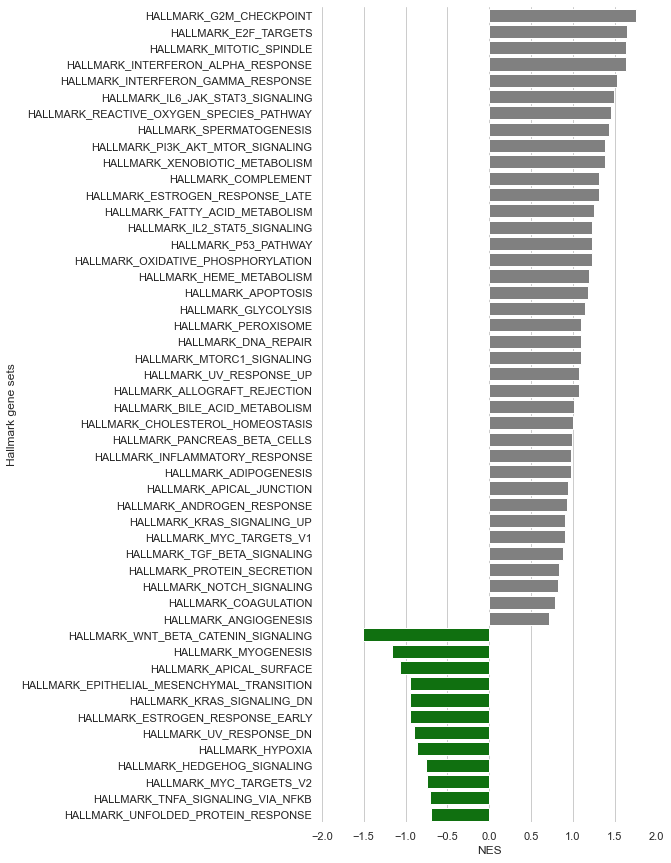

In [8]:
#graph a barplot based on NES score 
sns.set_theme(style="whitegrid")

# dataframe used is the combined df
data = df_combine 

# color the bars based on NES values
palette=["green" if x<0 else 'gray' for x in data.NES] 


# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

#plot NES and pathway name
sns.barplot(x="NES", y="NAME", data = df_combine, palette=palette)

# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(-2, 2), ylabel="Hallmark gene sets")
sns.despine(left=True, bottom=True)

#save/write the file
#plt.savefig("Fig_name_here.svg", format='svg', dpi=1200, bbox_inches='tight')
plt.show()

### Cluster/Heatmap on the genes in an enriched pathway of the pos_neg cell population
#### Seaborn clustermap
#### https://seaborn.pydata.org/generated/seaborn.clustermap.html?highlight=cluster#seaborn.clustermap
#### Example: the WNT_BETA_CATENIN_SIGNALING pathway

### NOTE:  these heatmaps will look slightly different than the ones generated by GSEA 

In [9]:
#read in gct file; skip first two rows of this file
df_WNT= pd.read_csv('/Users/carol/gsea_home/output/sep01/Teee_pp_pn.Gsea.1662073767537/HALLMARK_WNT_BETA_CATENIN_SIGNALING.gct', 
                     skiprows=2, delimiter = '\t')

In [10]:
df_WNT.shape

(36, 8)

In [11]:
# for a cluster/heatmap we just need gene names and expression values
# remove 'Description' column Not necessary. 
# reset index
df_WNT_viz= df_WNT.drop(columns=['DESCRIPTION'])
df_WNT_viz= df_WNT_viz.set_index(df_WNT_viz.columns[0])
df_WNT_viz= df_WNT_viz.rename_axis('Gene_Name')

In [13]:
# matrix should be 36 genes and 6 samples
df_WNT_viz.shape

(36, 6)

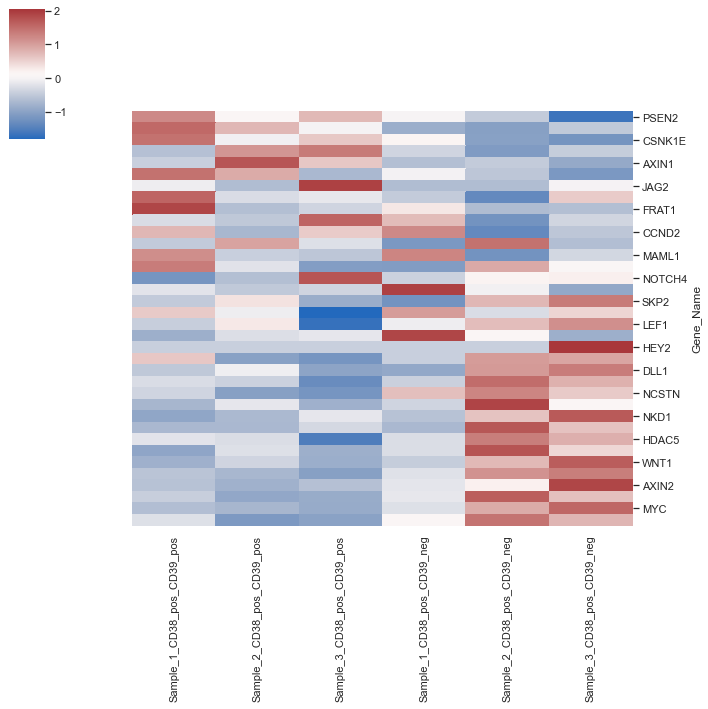

In [14]:
# z-score across rows (0)
g = sns.clustermap(df_WNT_viz, z_score=0, cmap="vlag", figsize= (10, 10),
                 row_cluster=False, col_cluster=False )

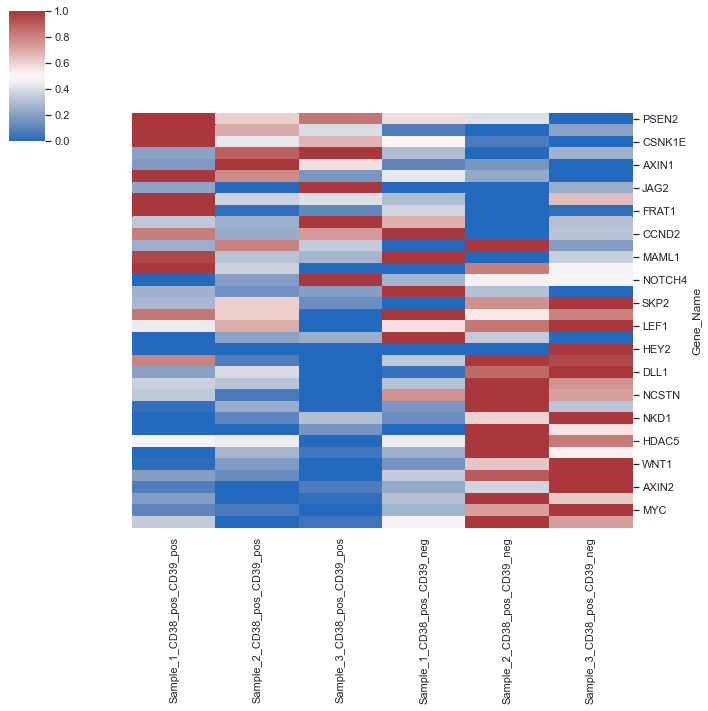

In [16]:
# standard_scale across rows (0)
g = sns.clustermap(df_WNT_viz, standard_scale=0, cmap="vlag", figsize= (10, 10),
                 row_cluster=False, col_cluster=False)

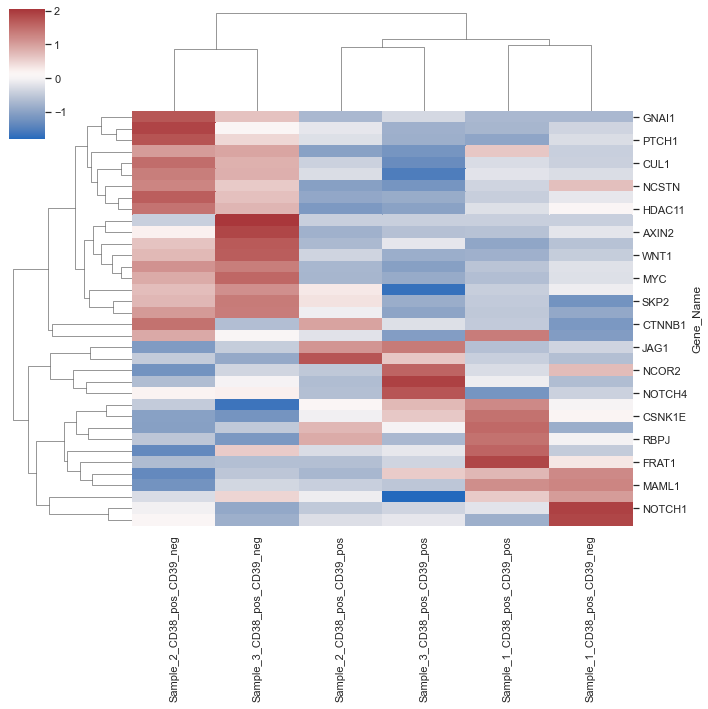

In [17]:
# z-score across rows (0)
# clustering by gene (rows) and by sample (columns)
g = sns.clustermap(df_WNT_viz, z_score=0, cmap="vlag", figsize= (10, 10),
                 row_cluster=True, col_cluster=True )

# Additional downstream analysis of GSEA results
## how to identify important genes and reduce dimensioanlity of enriched gene sets?
## Leading Edge Analysis 
#### "leading-edge subset in a gene set are those genes that appear in the ranked list at or before the point at which the running sum reaches its maximum deviation from zero. The leading-edge subset can be interpreted as the core that accounts for the gene set’s enrichment signal"
### https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5066188/

## Nonnegative Factorization to reduce dimensionality?
### http://ai.stanford.edu/~marinka/nimfa/
#### Tan et al 2016.  designed an analysis approach to identify sub-signatures of genes called “leading edge metagenes” (LEMs); non-negative matrix factorization (NMF) https://www.biorxiv.org/content/10.1101/043158v1.full

In [ ]:
#perform Leading Edge Analysis in GSEA desktop application
#the pp_pn GSEA results
#output files in folder my_analysis.LeadingEdgeTool.1662144829951

In [2]:
#read in the gct file from the Leading Edge Analysis
#matrix of the 50 Hallmark pathways and Genes in that subset that account for the pathway's enrichment signal
#binary: 1 if the gene is found in that pathway
#some genes may be identified in more than one pathway (ie overlapping)
df_le= pd.read_csv('/Users/carol/gsea_home/output/sep02/my_analysis.LeadingEdgeTool.1662144829951/leading_edge_matrix_for_results.9.gct', 
                   skiprows=2, delimiter = '\t')

In [3]:
#this comparison has 1293 genes identified as 'leading-edge'
df_le.shape

(50, 1293)

In [4]:
# for a cluster/heatmap we just need gene names and expression values
# remove 'Description' column Not necessary. 
# reset index
df_le_viz= df_le.drop(columns=['DESCRIPTION'])
df_le_viz= df_le_viz.set_index(df_le_viz.columns[0])
df_le_viz= df_le_viz.rename_axis('Pathway_Name')

/Users/carol/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


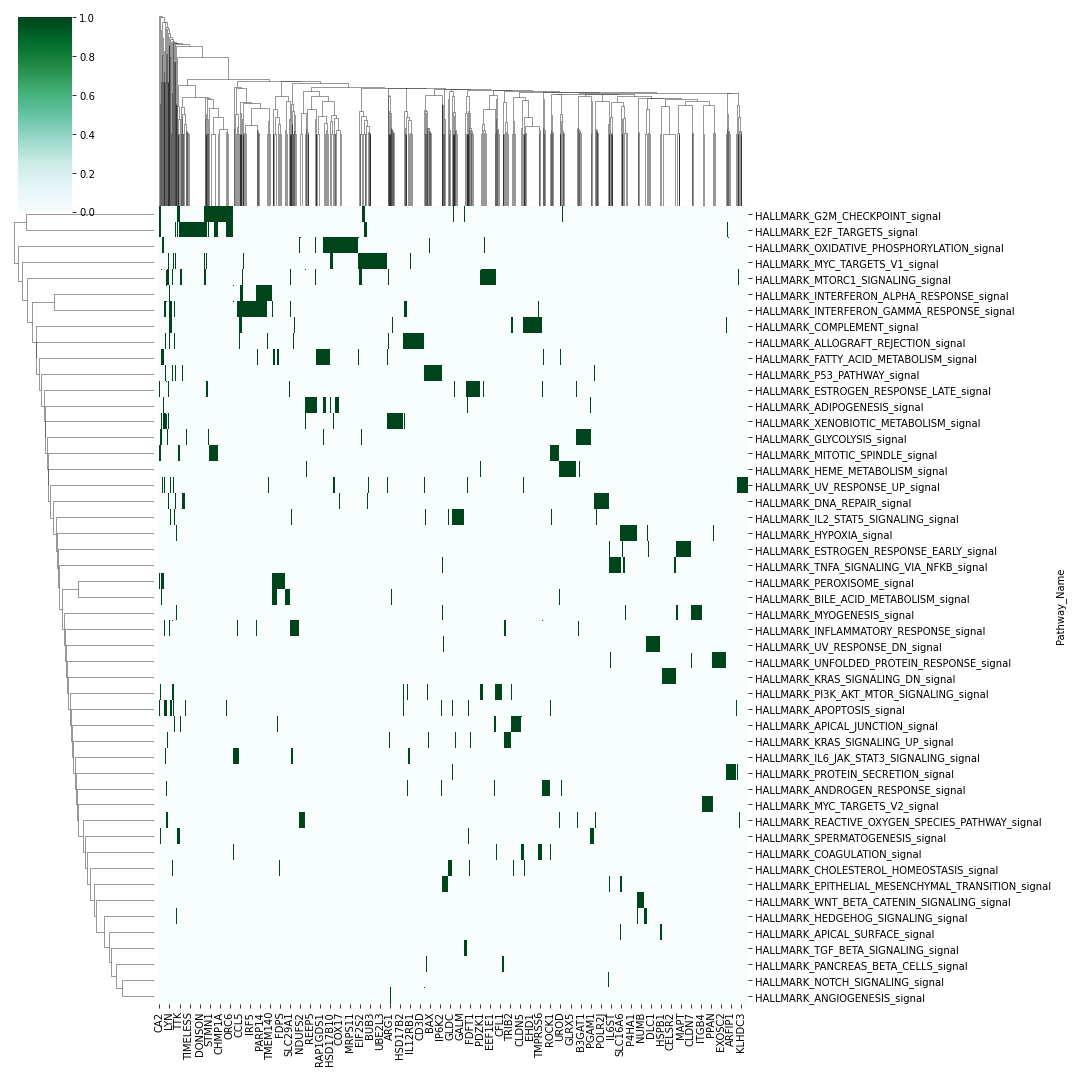

In [5]:
#cluster?
# binary: 1 if the gene is found in that pathway
# clustering by gene (rows) and by sample (columns)
g = sns.clustermap(df_le_viz, cmap="BuGn", figsize= (15, 15),
                 row_cluster=True, col_cluster=True )